## Sample notebooks for visualizing CNN classifier training and validation performance

In [13]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

## Change the `run_id` and `model_name` to plot the current model performance

Requires : The validation has to be run on the CNN classifier to generate the np_arrays ( `using tasks = train valid` ) in config. The `log_train.csv` must be present in the given directory.



In [14]:
# Using the absolute path
run_id = "20190621_203427"
model_name = "ConvNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


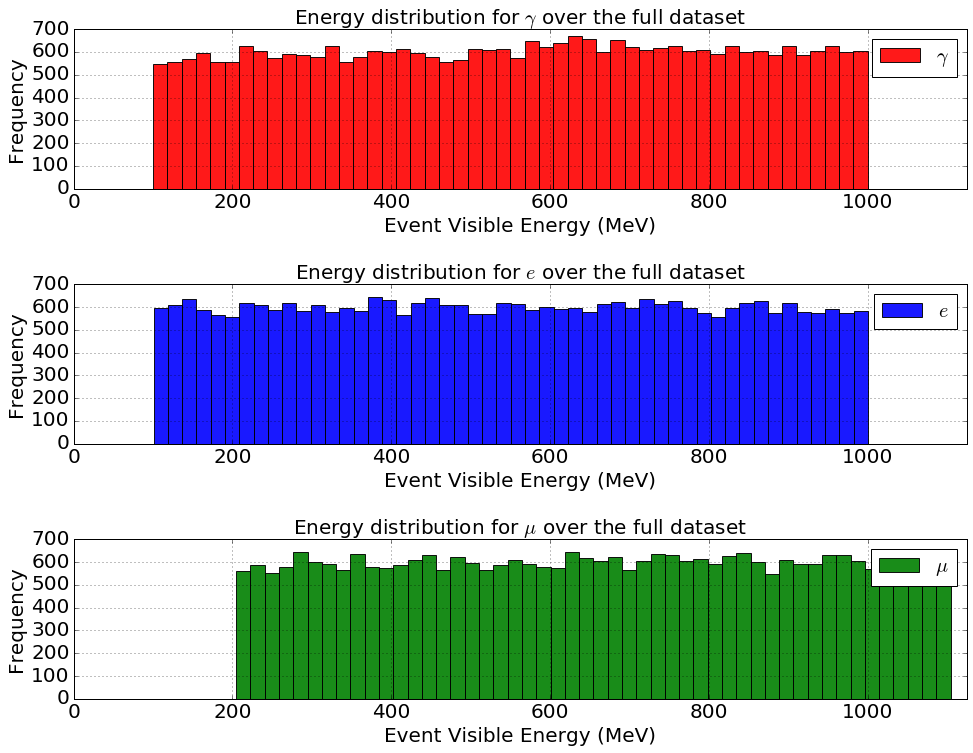

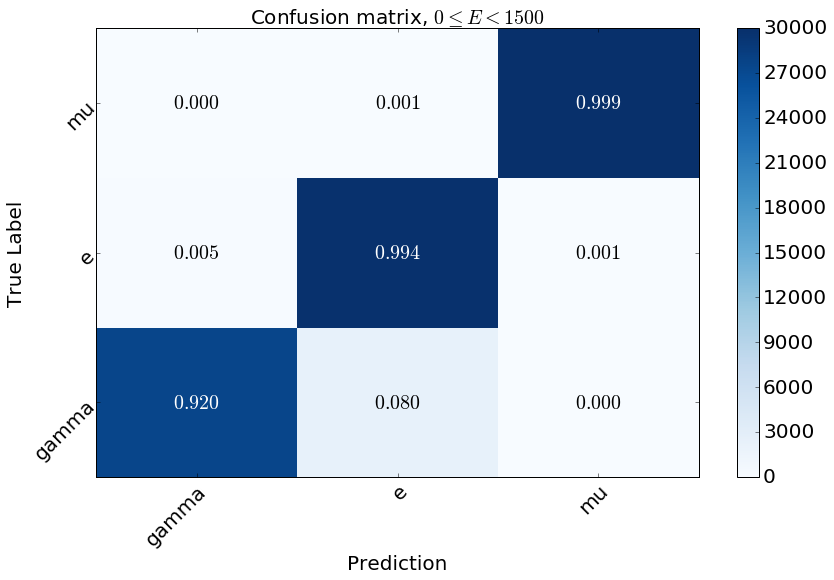

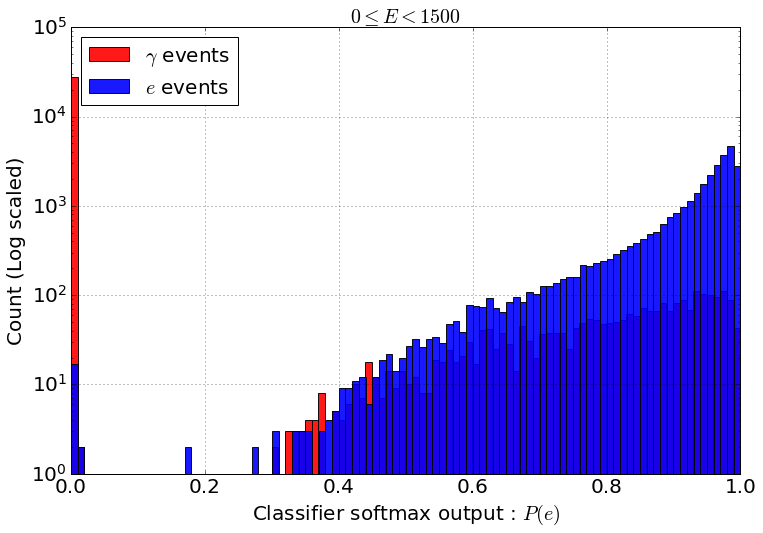

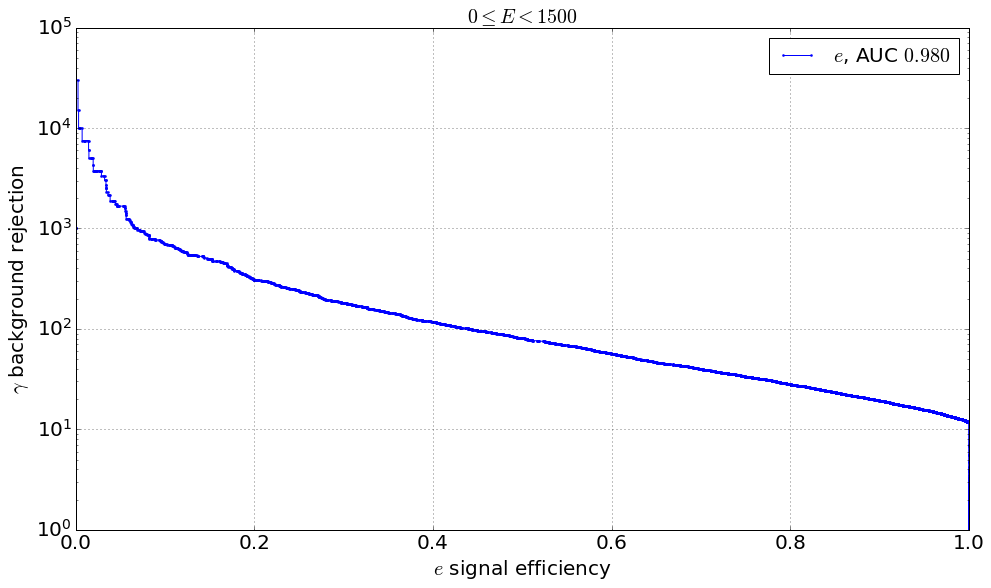

(array([0.        , 0.        , 0.        , ..., 0.97487521, 0.97494176,
        1.        ]),
 array([0.00000000e+00, 3.34023649e-05, 6.68047298e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.9999249e+00, 9.9992490e-01, 9.9937624e-01, ..., 2.8500132e-18,
        2.8451032e-18, 3.6501247e-23], dtype=float32),
 0.9801682000816107,
 array([0.        , 0.        , 0.        , ..., 0.99979959, 0.99979959,
        1.        ]),
 array([0.        , 0.91454243, 0.91470882, ..., 0.99996672, 1.        ,
        1.        ]),
 array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 1.4620375e-04,
        1.3176647e-04, 4.7919343e-06], dtype=float32),
 0.980074398348934)

In [19]:
# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Convert the energies from True to visible
plot_utils.convert_to_visible_energy(energies, labels)

# Plot the energy distribution
plot_utils.plot_event_energy_distribution(energies, labels, {"gamma":0, "e":1, "mu":2},
                                         show_plot=True)

# Plot the confusion matrix
plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"],
                                 show_plot=True)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"e":1}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

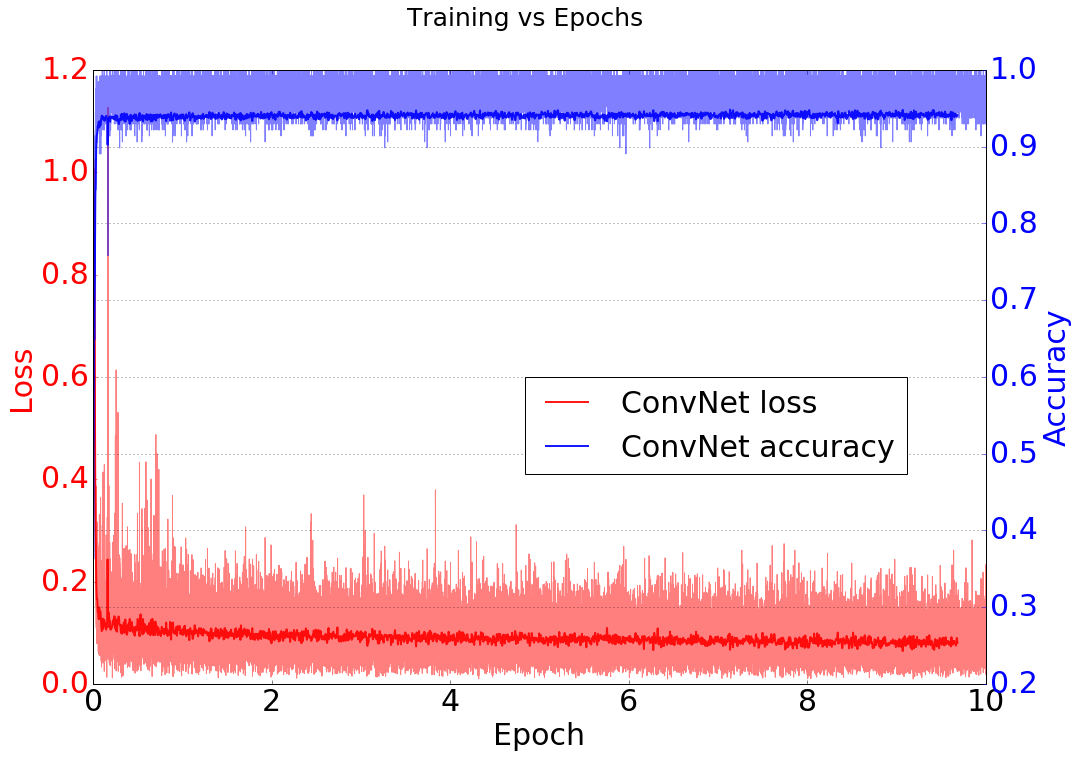

In [17]:
# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)